<a href="https://colab.research.google.com/github/ShoOoi/InfoMethods/blob/main/infoB2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 画像情報のAI体験
- YOLOと呼ばれる画像認識アルゴリズムの体験

In [ ]:
import os

working_dir="infob"
os.mkdir(working_dir) # working_dir は作業ディレクトリ
os.chdir(working_dir)

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
os.chdir('darknet')
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-08-29 14:42:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.6MB/s    in 6.2s    

2022-08-29 14:42:50 (37.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights 'data/dog.jpg'

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

(-0.5, 767.5, 575.5, -0.5)

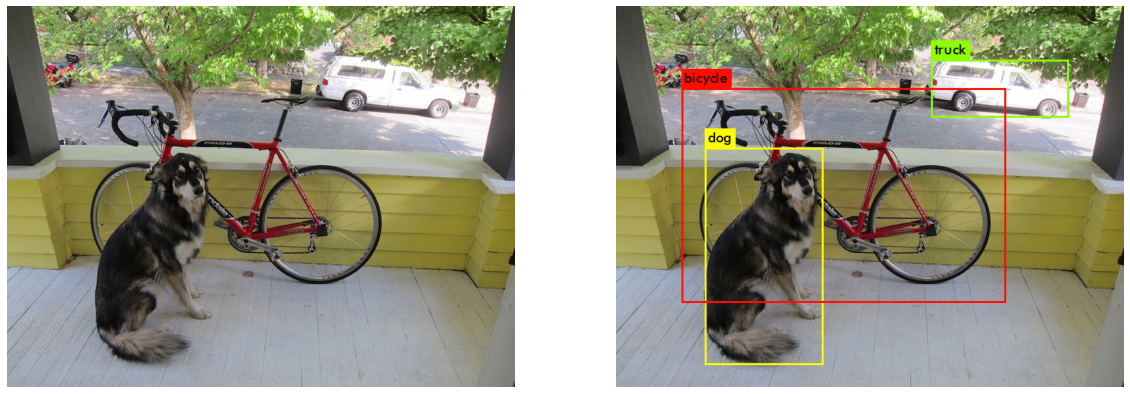

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

img_in = cv2.imread('data/dog.jpg')
img_out = cv2.imread('predictions.jpg')
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img_in[:,:,::-1]);plt.axis('off')
plt.subplot(122);plt.imshow(img_out[:,:,::-1]);plt.axis('off')

# テキスト処理の体験
- 簡単なチャットボットを作成してみよう

## 下準備
それでは初めにA3RTへの登録を行いAPIキーを取得します。
※A3RTは時折APIキーの発行までに15分程度時間がかかる場合があるため、最初に行います。

下記のリンクにアクセスして、メールアドレスを登録します。

[A3RT](https://a3rt.recruit.co.jp/product/talkAPI/)

認証が終わると登録したメールアドレスにAPIキー発行メールが届くので、APIキーをコピー出来るようにしておきましょう。
※この際空白部分などをコピーしないように注意しましょう。

In [2]:
!pip install pya3rt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 576 kB 32.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.6.0 requires requests>=2.19.0, but you have requests 2.12.4 which is incompatible.
tensorboard 2.8.0 requires requests<3,>=2.21.0, but you have requests 2.12.4 which is incompatible.
spacy 3.4.1 requires requests<3.0.0,>=2.13.0, but you have requests 2.12.4 which is incompatible.
pooch 1.6.0 requires requests>=2.19.0, but you have requests 2.12.4 which is incompatible.
pandas-datareader 0.9.0 requires requests>=2.19.0, but you have requests 2.12.4 which is incompatible.
google-c

実行してみて、「こんにちは」と入力してみる。

次に、APIキーを入れて最後実行。会話ができるようになります。

あなた＞こんにちは


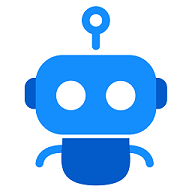

BOT＞こんにちは
あなた＞ありがとう


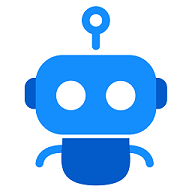

BOT＞どういたしまして
あなた＞


In [8]:
import requests
from IPython.display import Image
def talk_api(message):
    apikey = ""  #@param {type:"string",title:"キー入力"}
    talk_url = "https://api.a3rt.recruit.co.jp/talk/v1/smalltalk"
    payload = {"apikey": apikey, "query": message}
    response = requests.post(talk_url, data=payload)
    try:
        return response.json()["results"][0]["reply"]
    except:
        print(response.json())
        return "ごめんなさい。もう一度教えて下さい。"
def main():
     message = input("あなた＞")
     while(message!=""):
         display(Image('/content/bot.png'))
         print("BOT＞" + talk_api(message))
         message = input("あなた＞")
if __name__ == "__main__":
     main()

## 少し応用
アイコンを作ってみよう

[WAIFU LABS](https://waifulabs.com/)にアクセスしてアイコンを生成しましょう

生成後、左下の「Download this girl」をクリックして画像をダウンロードします。

そして、画像の名前を「Bot.png」に変更して、D&Dします。
その後、下のプログラム（さっきのを実行すると画像が出ます）

様々なキャラクタの語尾などをつけてみたり、色々な表情のキャラクタを分岐処理で出してみたりしてみましょう。

あなた：こんにちは


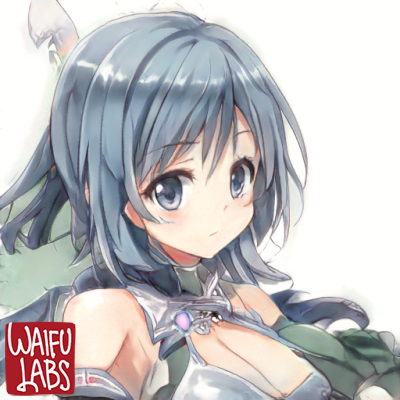

BOT：こんにちは
あなた：おはよう


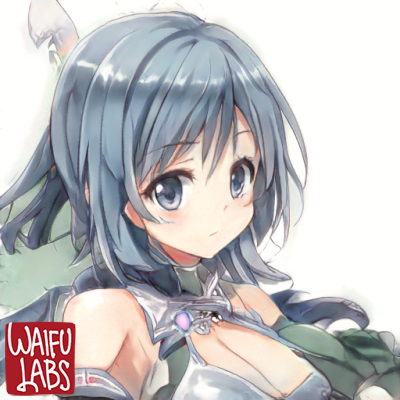

BOT：おはようございます
あなた：

KeyboardInterrupt: ignored

In [ ]:
import requests
from IPython.display import Image
def talk_api(message):
    apikey = ""  #@param {type:"string",title:"キー入力"}
    talk_url = "https://api.a3rt.recruit.co.jp/talk/v1/smalltalk"
    payload = {"apikey": apikey, "query": message}
    response = requests.post(talk_url, data=payload)
    try:
        return response.json()["results"][0]["reply"]
    except:
        print(response.json())
        return "ごめんなさい。もう一度教えて下さい。"
def main():
     message = input("あなた＞")
     while(message!=""):
         display(Image('/content/bot.png'))
         print("BOT＞" + talk_api(message))
         message = input("あなた＞")
if __name__ == "__main__":
     main()